# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex medium (512), strong scaling benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [15]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [16]:
import sys
sys.path.append('../../../python-modules')

In [17]:
from appanalysis import osbli

## Read data files

### ARCHER

In [18]:
archerfiles = {1:'../TGV512ss/results/ARCHER/output_1nodes_201808020923.txt',
               2:'../TGV512ss/results/ARCHER/output_2nodes_201808020946.txt',
               4:'../TGV512ss/results/ARCHER/output_4nodes_201808021232.txt',
               8:'../TGV512ss/results/ARCHER/output_8nodes_201808021357.txt',
               16:'../TGV512ss/results/ARCHER/output_16nodes_201808030211.txt',
               32:'../TGV512ss/results/ARCHER/output_32nodes_201808030731.txt',
               }

In [19]:
archercpn = 24
archernodes, archertime, archerperf = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              24            10.0                0.100
              2              48             4.9                0.205
              4              96             2.9                0.346
              8             192             1.4                0.703
             16             384             0.7                1.519
             32             768             0.4                2.850


### Cirrus

In [20]:
cirrusfiles = {1:'../TGV512ss/results/Cirrus/output_1nodes_201808020826.txt',
               2:'../TGV512ss/results/Cirrus/output_2nodes_201808020850.txt',
               4:'../TGV512ss/results/Cirrus/output_4nodes_201808020916.txt',
               8:'../TGV512ss/results/Cirrus/output_8nodes_201808020924.txt'
               }

In [21]:
cirruscpn = 36
cirrusnodes, cirrustime, cirrusperf = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              36            10.3                0.097
              2              72             5.4                0.186
              4             144             3.0                0.331
              8             288             1.4                0.713


### Peta4 Skylake

In [22]:
peta4files = {1:'../TGV512ss/results/CSD3-Skylake/output_1nodes_201808021001.txt',
              2:'../TGV512ss/results/CSD3-Skylake/output_2nodes_201808021100.txt',
              4:'../TGV512ss/results/CSD3-Skylake/output_4nodes_201808030739.txt',
              8:'../TGV512ss/results/CSD3-Skylake/output_8nodes_201808030840.txt',
               }

In [23]:
peta4cpn = 32
peta4nodes, peta4time, peta4perf = osbli.calcperf(peta4files, peta4cpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              32             8.2                0.122
              2              64             4.3                0.235
              4             128             2.3                0.435
              8             256             1.2                0.841


### Isambard

In [24]:
gw4files = {1:'../TGV512ss/results/Isambard/output_1nodes_201808020732.txt'
               }

In [25]:
gw4cpn = 64
gw4nodes, gw4time, gw4perf = osbli.calcperf(gw4files, gw4cpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              64             5.6                0.178


### Tesseract

In [26]:
tessfiles = {1:'../TGV512ss/results/Tesseract/output_1nodes_201808021543.txt',
             2:'../TGV512ss/results/Tesseract/output_2nodes_201808021529.txt',
             4:'../TGV512ss/results/Tesseract/output_4nodes_201808021621.txt',
             8:'../TGV512ss/results/Tesseract/output_8nodes_201808030732.txt',
             16:'../TGV512ss/results/Tesseract/output_16nodes_201808030739.txt',
             32:'../TGV512ss/results/Tesseract/output_32nodes_201808030835.txt',
               }

In [27]:
tesscpn = 24
tessnodes, tesstime, tessperf = osbli.calcperf(tessfiles, tesscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              24            15.2                0.066
              2              48             6.5                0.155
              4              96             3.6                0.279
              8             192             1.7                0.574
             16             384             0.9                1.159
             32             768             0.5                2.076


## Plot performance

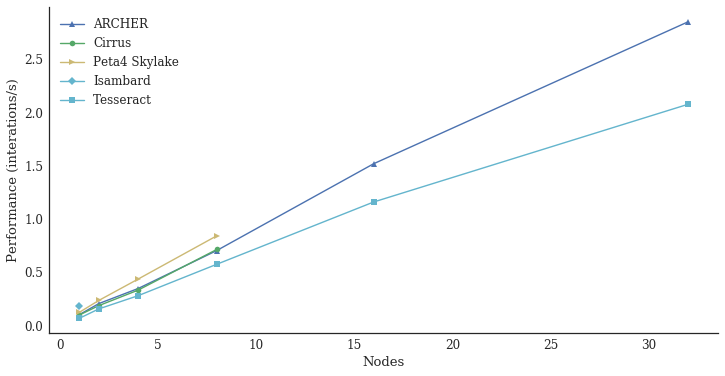

In [28]:
plt.plot(archernodes, archerperf, '^-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(peta4nodes, peta4perf, '>-', color=cols[4], label='Peta4 Skylake')
plt.plot(gw4nodes, gw4perf, 'D-', color=cols[5], label='Isambard')
plt.plot(tessnodes, tessperf, 's-', color=cols[5], label='Tesseract')
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

## Compare performance

In [29]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]*archercpn
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]*cirruscpn
nperf['Peta4 Skylake'] = peta4time[0]
cperf['Peta4 Skylake'] = peta4time[0]*peta4cpn
nperf['Isambard'] = gw4time[0]
cperf['Isambard'] = gw4time[0]*gw4cpn
nperf['Tesseract'] = tesstime[0]
cperf['Tesseract'] = tesstime[0]*tesscpn

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '==============', '==========='))
print("per-node")
for system in sorted(nperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system]))

print("per-core")
for system in sorted(cperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system]))

Performance improvement relative to ARCHER:

         System  Iter. Time (s)     Improvement
         ======  ==============     ===========
per-node
         ARCHER           9.999           1.000
         Cirrus          10.313           0.970
       Isambard           5.628           1.777
  Peta4 Skylake           8.191           1.221
      Tesseract          15.203           0.658
per-core
         ARCHER         239.979           1.000
         Cirrus         371.268           0.646
       Isambard         360.220           0.666
  Peta4 Skylake         262.108           0.916
      Tesseract         364.861           0.658


The per-core comparisons are extrapolated from the single node performance numbers assuming perfect scaling within a node.